# WORK IN PROGRESS: 

Working with a rotated pole (RACMO data)

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfe
import pyproj

# Read in data

In [3]:
ds = xr.open_dataset('~/DATA/RACMO/racmo_sample.nc')

# Look at dataset we have just read in

In [4]:
ds.precip

<xarray.DataArray 'precip' (time: 5, height: 1, rlat: 240, rlon: 262)>
[314400 values with dtype=float32]
Coordinates:
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 -31.75 -31.5 -31.25 ...
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 -29.0 -28.75 -28.5 ...
  * height   (height) float64 0.0
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 2001-01-03 ...
Attributes:
    standard_name:  precipitation_flux
    long_name:      Total Precipitative Flux
    units:          kg m-2 s-1
    cell_methods:   time: 24-hr averaged values
    grid_mapping:   rotated_pole

# Select precip 'Data variable' and squeeze to remove height (as it has a size of 1)

In [5]:
precip = ds.precip.squeeze()
precip

<xarray.DataArray 'precip' (time: 5, rlat: 240, rlon: 262)>
[314400 values with dtype=float32]
Coordinates:
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 -31.75 -31.5 -31.25 ...
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 -29.0 -28.75 -28.5 ...
    height   float64 0.0
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 2001-01-03 ...
Attributes:
    standard_name:  precipitation_flux
    long_name:      Total Precipitative Flux
    units:          kg m-2 s-1
    cell_methods:   time: 24-hr averaged values
    grid_mapping:   rotated_pole

# Project rotated grid onto lat-lon grid !!!

In [6]:
ds.rotated_pole

<xarray.DataArray 'rotated_pole' ()>
array(9.96921e+36, dtype=float32)
Attributes:
    grid_mapping_name:          rotated_latitude_longitude
    grid_north_pole_latitude:   -180.0
    grid_north_pole_longitude:  -170.0
    proj4_params:               -m 57.295779506 +proj=ob_tran +o_proj=latlon ...
    proj_parameters:            -m 57.295779506 +proj=ob_tran +o_proj=latlon ...
    projection_name:            rotated_latitude_longitude
    long_name:                  projection details
    EPSG_code:                  

In [60]:
rad2deg = 180./np.pi

p = pyproj.Proj('+proj=ob_tran +o_proj=latlon +o_lat_p=-180.0 +o_lon_p=10.0 +lon_0=180.0')

x1,y1 = np.meshgrid(ds.rlon.values, ds.rlat.values)

lon, lat = p(x1, y1) 

lon, lat = lon*rad2deg, lat*rad2deg

In [61]:
np.min(precip.values), np.max(precip.values), np.min(lon), np.max(lon), np.min(lon), np.max(lon), np.min(lat), np.max(lat)

(-9.042266e-08,
 0.000896179,
 -179.99416710873106,
 179.98894588985067,
 -179.99416710873106,
 179.98894588985067,
 -90.0,
 -46.74917892351621)

# Plot map

Text(0.5, 1.0, 'My title \n')

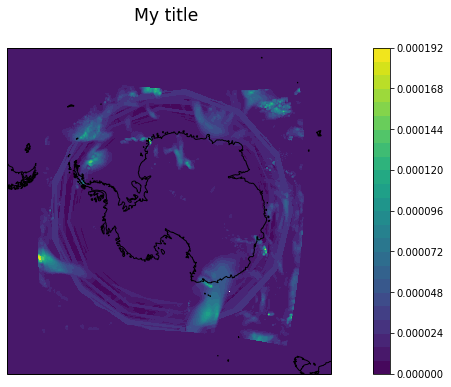

In [62]:
plt.figure(figsize=(15,6))

ax = plt.subplot( projection=ccrs.Stereographic(central_longitude=7., central_latitude=-90.) )

ax.set_extent([-180,180,-90,-50], ccrs.PlateCarree())

result = ax.contourf( lon, lat, precip.isel(time=0), levels=30, transform=ccrs.PlateCarree() )

ax.coastlines(resolution='50m')
plt.colorbar(result)

ax.set_title('My title \n', size='xx-large')